# Tree-Based Methods

-------------------

In [ ]:
indices = np.argsort(importances)[::-1]
feat_labels = data.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f +1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))
    
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color='lightblue',
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
X_selected = sfm.transform(X_train)

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f +1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

# plotting the fit
plt.scatter(X[sort_idx], y[sort_idx], c='lightblue')
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='red', linewidth=2)

from sklearn.tree import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000,
                              criterion='mse',
                              random_state=1,
                              n_jobs=1)
forest.fit(X_train, y_train)


## Exercise - Test error from Random Forests.

In the lab, we applied random forests to the `Boston` data using `max_features = 6` and using `n_estimators = 25` and `n_estimators = 500`. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for `max_features` and `n_estimators`. Describe the results obtained.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
% matplotlib inline

In [5]:
boston = pd.read_csv('boston.csv')
boston.drop('Unnamed: 0', axis=1, inplace=True)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [63]:
featureRange = list(range(1, boston.columns[1:].shape[0] + 1))
estimatorRange = list(range(1, len(boston) + 1))
errDictByFeat = {1:{}, 2:{}, 3:{}, 4:{}, 5:{}, 6:{}, 7:{}, 8:{}, 9:{}, 10:{}, 11:{}, 12:{}, 13:{}}
errDictTotal = {}

X = boston.drop('medv', 1)
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


for estimator in estimatorRange:
    forest = RandomForestRegressor(n_estimators=estimator,
                                   max_features='auto',
                                   random_state=0,
                                   n_jobs=3)
    forest.fit(X_train, y_train)
    errDictByFeat[forest.n_features_][estimator] = mean_squared_error(y_test, forest.predict(X_test))
    errDictTotal[estimator] = mean_squared_error(y_test, forest.predict(X_test))
    if estimator % 100 == 0:
        print(f"{estimator/100} estimations done.")

1.0 estimations done.
2.0 estimations done.
3.0 estimations done.
4.0 estimations done.
5.0 estimations done.


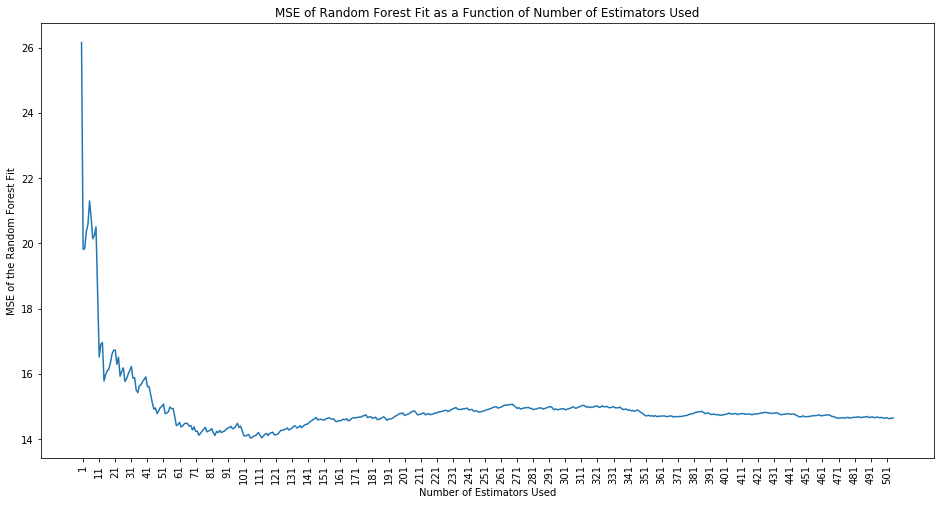

In [82]:
plt.figure(figsize=(16,8))
plt.plot(range(len(errDictTotal)), list(errDictTotal.values()))
plt.xticks(range(1, len(errDictTotal), 10), list(errDictTotal.keys())[::10], rotation=90)
plt.title('MSE of Random Forest Fit as a Function of Number of Estimators Used')
plt.xlabel('Number of Estimators Used')
plt.ylabel('MSE of the Random Forest Fit')
plt.show()

## Exercise - Trees for Regression.

In the lab, a classification tree was applied to the `Carseats` data set after converting `Sales` into a qualitative response variable. Now we will seek to predict `Sales` using regression trees and related approaches, treating the response as a quantitative variable.

a) Split the data set into a training set and a test set.

In [89]:
from sklearn.preprocessing import LabelEncoder

In [93]:
carseats = pd.read_csv('Carseats.csv', index_col=0)
le = LabelEncoder()
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])

In [94]:
X = carseats.drop('Sales', 1)
y = carseats['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test error rate do you obtain ?

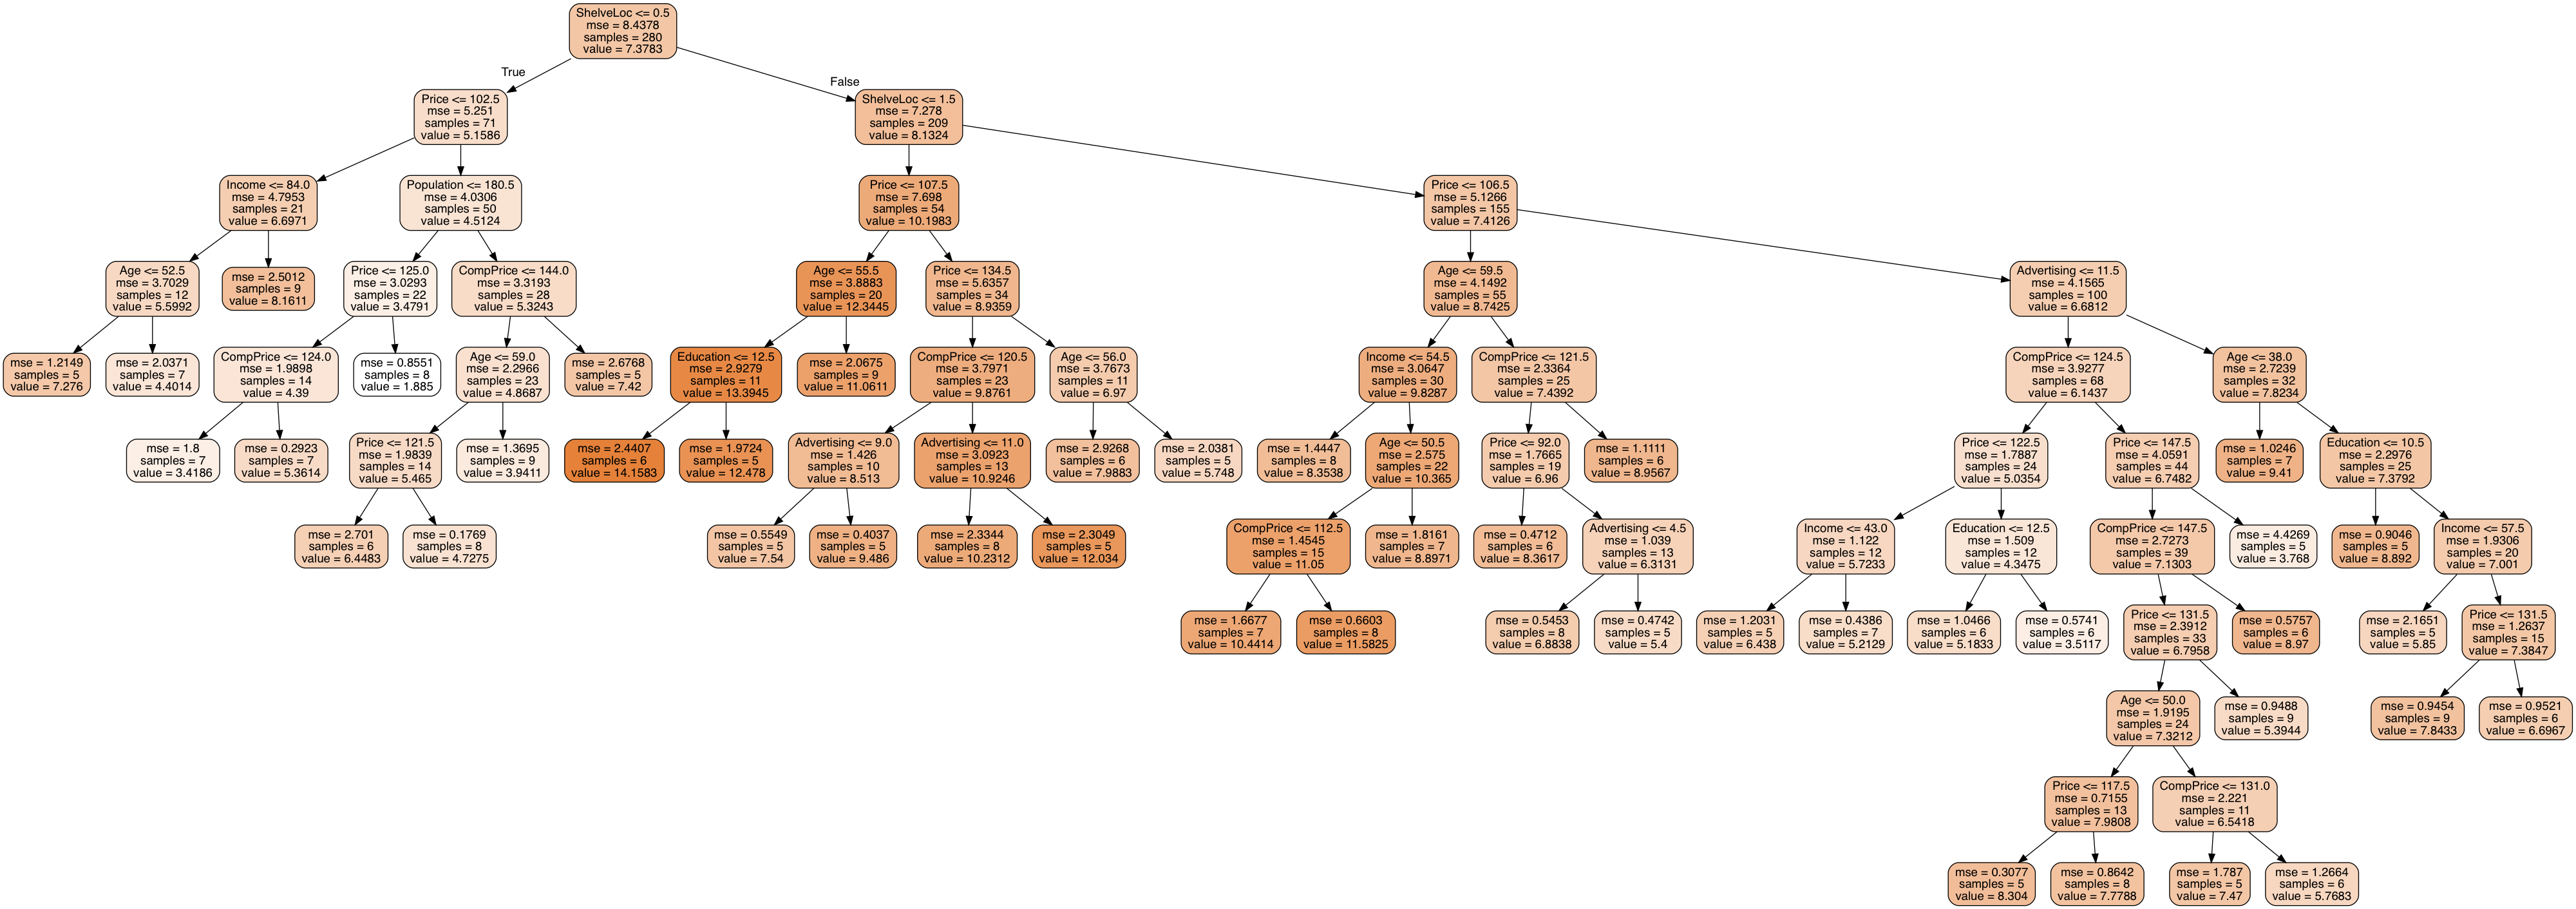

Decision Tree MSE: 3.93252475748


In [126]:
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
from IPython.display import display
from sklearn.tree import export_graphviz
import pydotplus

tree = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5)
tree.fit(X_train, y_train)

dot_data = export_graphviz(
tree,
out_file=None,
feature_names=X.columns,
class_names=y_train,
filled=True,
rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

print("Decision Tree MSE: %s" % mean_squared_error(y_test, tree.predict(X_test)))

c) Use the bagging approach in order to analyze this data. What test error rate do you obtain ?

In [127]:
from sklearn.ensemble import BaggingRegressor

bs = BaggingRegressor()
bs.fit(X_train, y_train)

print("Bagging MSE: %s" % mean_squared_error(y_test, bs.predict(X_test)))

Bagging MSE: 2.901306775


d) Use random forests to analyze this data. What test error rate do you obtain ? Examine the `feature_importances_` attribute to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [128]:
forest = RandomForestRegressor(n_estimators=len(carseats),
                                   max_features='auto',
                                   random_state=0,
                                   n_jobs=4)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=4, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [130]:
print("Random Forest MSE: %s" % mean_squared_error(y_test, forest.predict(X_test)))

Random Forest MSE: 2.14669285713


 1) Price                          0.296793
 2) ShelveLoc                      0.279300
 3) Age                            0.104128
 4) CompPrice                      0.103503
 5) Advertising                    0.070448
 6) Income                         0.060295
 7) Population                     0.045175
 8) Education                      0.029715
 9) US                             0.005807
10) Urban                          0.004835


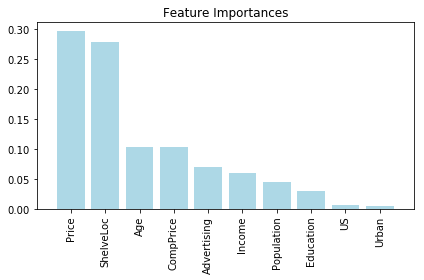

In [133]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
feat_labels = carseats.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f +1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))
    
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color='lightblue',
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## Exercise - Trees and Orange Juice.

This problem involves the “OJ” data set.

a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [155]:
oj = pd.read_csv('OJ.csv', index_col=0)
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [135]:
oj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1 to 1070
Data columns (total 18 columns):
Purchase          1070 non-null object
WeekofPurchase    1070 non-null int64
StoreID           1070 non-null int64
PriceCH           1070 non-null float64
PriceMM           1070 non-null float64
DiscCH            1070 non-null float64
DiscMM            1070 non-null float64
SpecialCH         1070 non-null int64
SpecialMM         1070 non-null int64
LoyalCH           1070 non-null float64
SalePriceMM       1070 non-null float64
SalePriceCH       1070 non-null float64
PriceDiff         1070 non-null float64
Store7            1070 non-null object
PctDiscMM         1070 non-null float64
PctDiscCH         1070 non-null float64
ListPriceDiff     1070 non-null float64
STORE             1070 non-null int64
dtypes: float64(11), int64(5), object(2)
memory usage: 158.8+ KB


In [156]:
le = LabelEncoder()
oj['Store7'] = le.fit_transform(oj['Store7'])
#oj['Purchase'] = le.fit_transform(oj['Purchase'])

In [183]:
X = oj.drop('Purchase', 1)
y = oj['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1070-800, random_state=0)

b) Fit a tree to the training data, with `Purchase` as the response and the other variables except for `Buy` as predictors.  What is the training error rate?

In [188]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [189]:
print(f"Decision Tree training error rate: {1 - tree.score(X_train, y_train)}")

Decision Tree training error rate: 0.10750000000000004


c) Create a plot of the tree, and interpret the results.

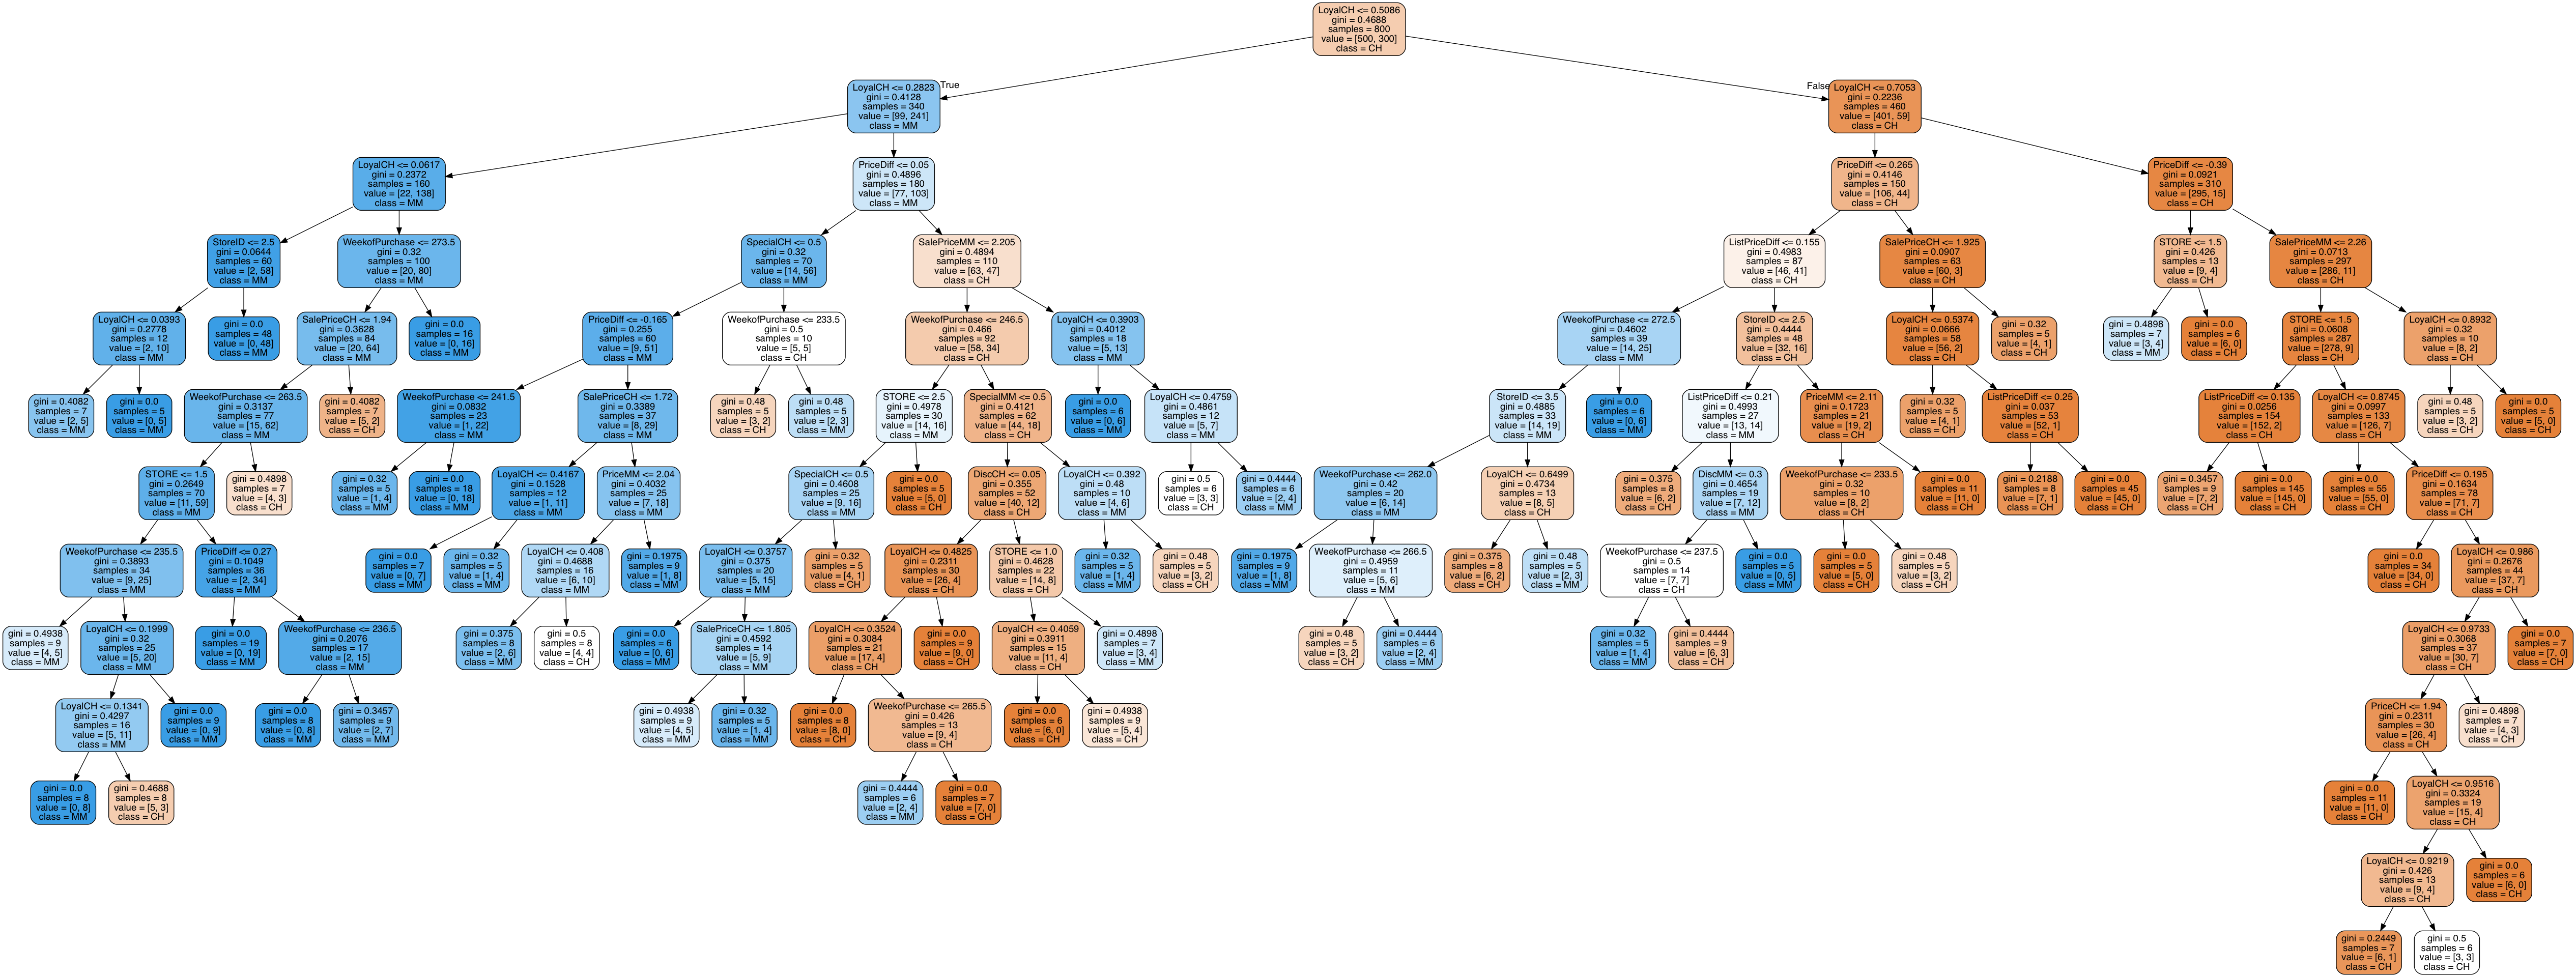

In [190]:
dot_data = export_graphviz(
tree,
out_file=None,
feature_names=X.columns,
class_names=y_train.unique(),
filled=True,
rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

I dunno they look like pretty sweet results

e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [191]:
from sklearn.metrics import confusion_matrix
predictions = tree.predict(X_test)
print(confusion_matrix(y_test, predictions, labels=y_train.unique()))

[[124  29]
 [ 27  90]]


In [192]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

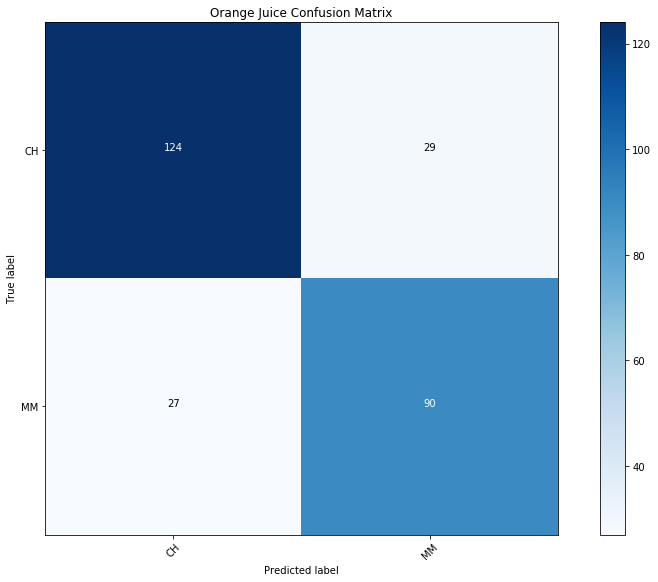

In [193]:
plt.figure(figsize=(12,8))
predictions = tree.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cnf_matrix, classes=y_train.unique(),
                      title='Orange Juice Confusion Matrix')

In [194]:
print(f"Decision Tree test error rate: {1 - tree.score(X_test, y_test)}")

Decision Tree test error rate: 0.20740740740740737


## Exercise - Boosting and Baseball Players.

We now use boosting to predict “Salary” in the “Hitters” data set.

a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

c) Perform boosting on the training set with 1000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen before.

f) Which variables appear to be the most important predictors in the boosted model?

g) Now apply bagging to the training set. What is the test set MSE for this approach ?

## Exercise - Boosting vs. other Classification algorithms.

This question uses the `Caravan` data set.

a) Create a training set consisting of the first 1000 observations, and a test set consisting of the remaining observations.

b) Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1000 trees, and a shrinkage value of 0.01. Which predictors appear to be most important?

c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20%. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

## Exercise - Open-ended exploration.

Apply boosting, bagging, and random forests to a data set of your choice. Be sure to fit models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?